# Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# below lines in order to be able to visualize the x and y axis instead having everything in black to be in white format
from jupyterthemes import jtplot

jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

# Importing Data Set

In [24]:
mining_df = pd.read_csv("mining_data.csv")
X = mining_df.drop(columns="% Silica Concentrate")
y = mining_df["% Silica Concentrate"]

In [25]:
X.shape

(245700, 22)

In [26]:
y.shape

(245700,)

In [27]:
# converting data frame into numpy array
X = np.array(X)
y = np.array(y)

In [28]:
# reshapping y into 2 Dimenssional Array
y = y.reshape(-1, 1)
y.shape

(245700, 1)

# SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
print(f"X_train : {X_train.shape} ")
print(f"X_test  : {X_test.shape}  ")
print(f"y_train : {y_train.shape} ")
print(f"y_test  : {y_test.shape}  ")

X_train : (196560, 22) 
X_test  : (49140, 22)  
y_train : (196560, 1) 
y_test  : (49140, 1)  


# FEATURE SCALING

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

SC = StandardScaler()
SC.fit_transform(X_train, y_train)

array([[ 0.76350766, -0.90244251, -0.58885728, ..., -0.1135047 ,
        -0.05939588,  1.11910141],
       [ 0.21466557, -0.36483239,  0.64988764, ..., -0.4966946 ,
        -0.40954116,  0.51149986],
       [-0.28375285,  0.18746653,  0.43596047, ..., -1.44860496,
        -1.16259611, -1.57936428],
       ...,
       [ 0.65490286, -0.48821832,  1.31698223, ...,  0.89160194,
         0.89528307,  0.72594747],
       [ 0.7538108 , -0.86131387, -0.34236189, ..., -0.97511344,
        -1.14001521, -0.64115601],
       [-0.16932995,  0.04057852,  2.68753967, ..., -0.6984646 ,
        -0.64986675,  0.76168873]])

# EVALUATE DECISSION TREE MODEL

In [32]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.983056412128319

# Prediction on Decission Tree

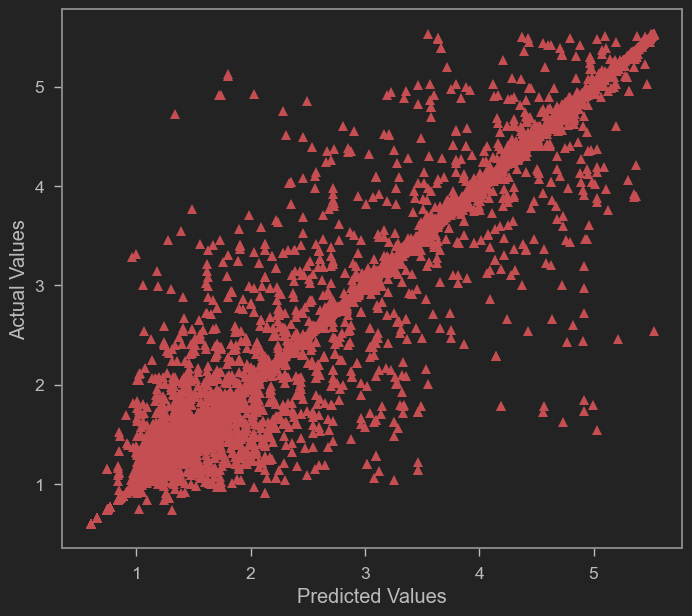

In [33]:
y_predict = DecisionTree_model.predict(X_test)
plt.plot(y_predict, y_test, "^", color="r")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)
RSME = float(format(np.sqrt(mean_squared_error(y_test,y_predict)),'.3f'))
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print(f'RSME = {RSME} \n MSE = {MSE} \n MAE = {MAE} \n R2 = {r2} \n Adjusted R2 = {adj_r2}')

RSME = 0.147 
 MSE = 0.021473130192291294 
 MAE = 0.02229094347307197 
 R2 = 0.983056412128319 
 Adjusted R2 = 0.9830488229243126
